## Exploration des données

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/train.csv')

In [3]:
train.shape

(9063, 13)

In [4]:
train.describe()

,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.00000,9063.000000,9063.000000,9063.000000,9063.000000
mean,4531.000000,2.256538,0.026371,0.682886,1.408695,20.454037,23.855776,61.09776,12.968729,35.175770,143.530067,178.705837
std,2616.407078,1.041754,0.160245,0.465378,0.635883,8.079983,8.787939,19.55179,8.262341,48.868148,140.005449,170.535533
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,2265.500000,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.00000,7.001500,4.000000,33.000000,39.000000
50%,4531.000000,2.000000,0.000000,1.000000,1.000000,21.320000,24.240000,61.00000,12.998000,16.000000,109.000000,134.000000
75%,6796.500000,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,77.00000,19.001200,48.000000,206.000000,266.000000
max,9062.000000,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.00000,56.996900,367.000000,790.000000,897.000000


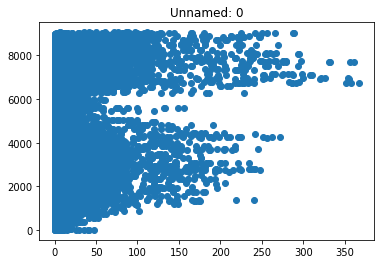

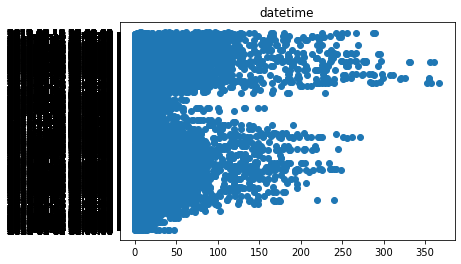

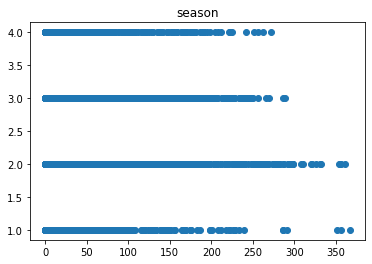

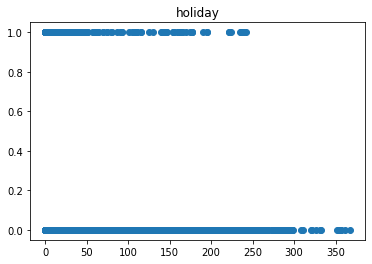

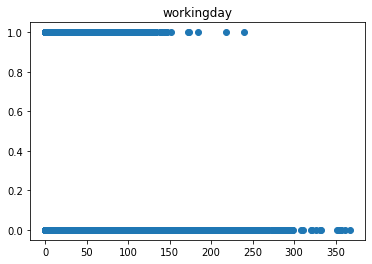

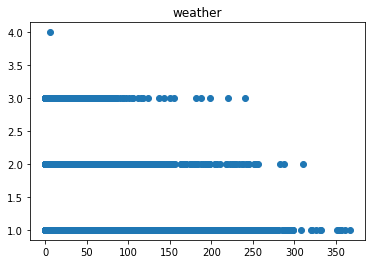

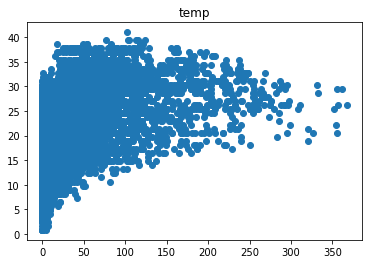

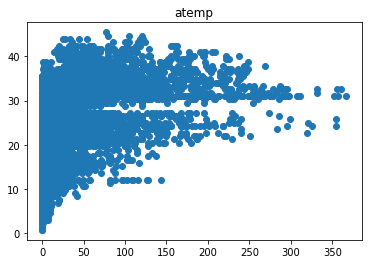

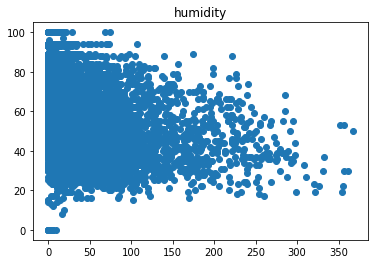

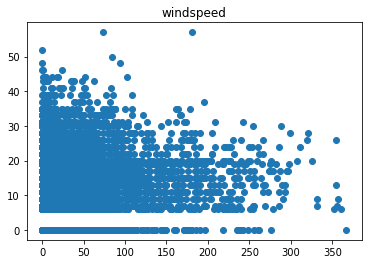

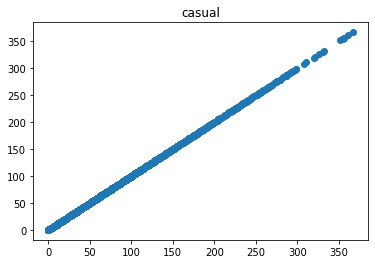

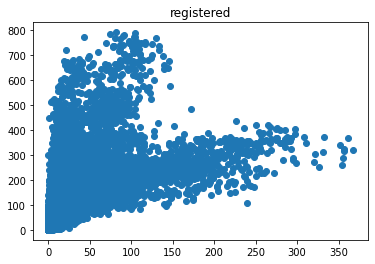

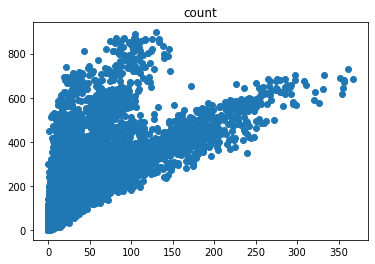

In [5]:
for col in train.columns:
    plt.scatter(x = train['casual'], y =train[col])
    plt.title(col)  
    plt.show()

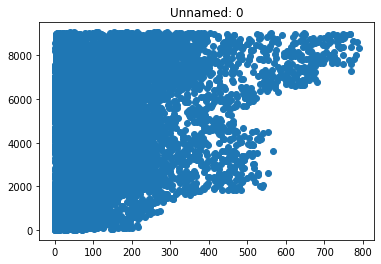

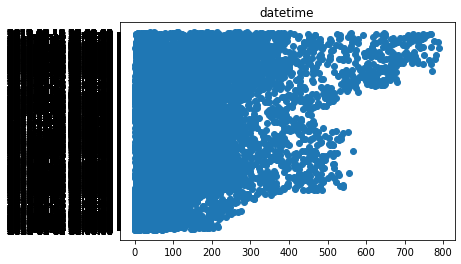

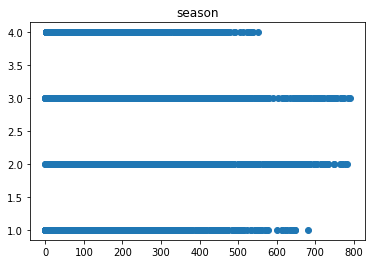

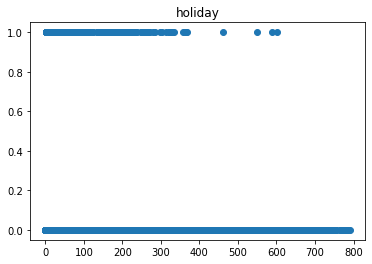

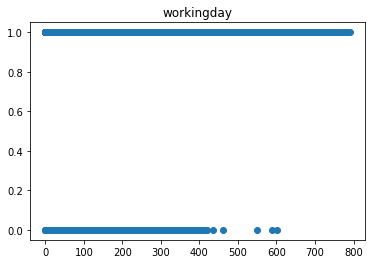

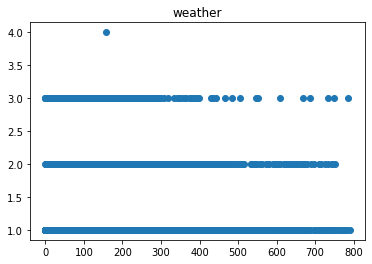

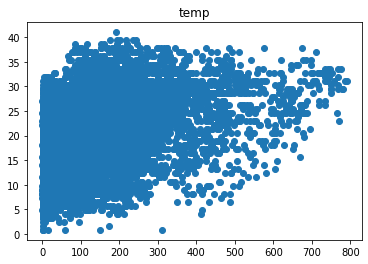

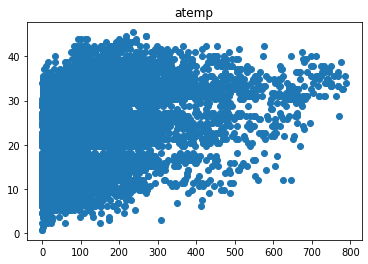

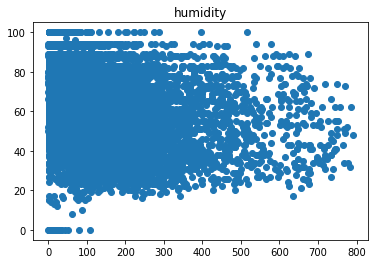

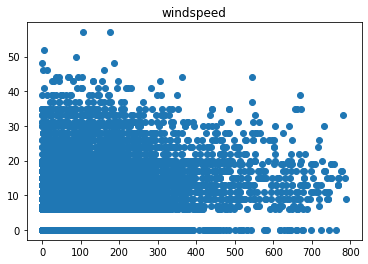

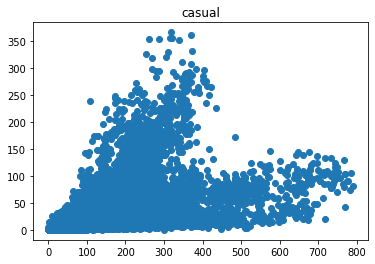

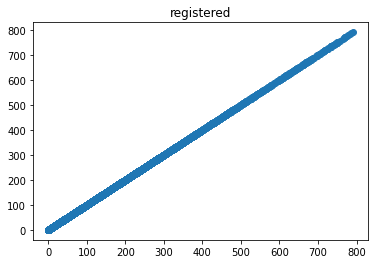

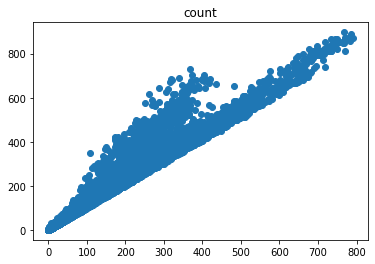

In [6]:
for col in train.columns:
    plt.scatter(x = train['registered'], y =train[col])
    plt.title(col)  
    plt.show()

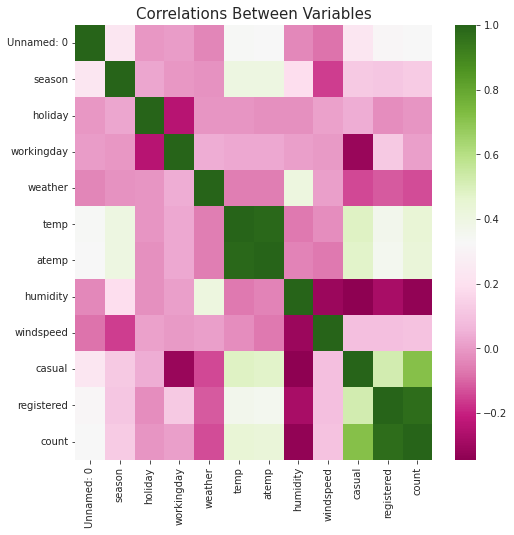

In [7]:
with sns.axes_style('ticks', {'figure.facecolor': 'white'}):
    plt.figure(figsize=(8,8))
    sns.heatmap(train.corr(),cmap="PiYG")
    plt.title("Correlations Between Variables", size=15)
    plt.show()

In [8]:
train =train.drop(columns=['casual','registered'],axis=1)

## Cluestering 

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#num_attributes = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 
#                'payment_value', 'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
# cat_attributes = ['order_status', 'customer_state', 'payment_type']


num_attributes = train.select_dtypes(include=['float']).columns.tolist()
cat_attributes = train.select_dtypes(include=['object']).columns.tolist()

pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_attributes),
        ('cat', OneHotEncoder(), cat_attributes),
])
df_prepared = pipeline.fit_transform(train)
df_prepared


<9063x9066 sparse matrix of type '<class 'numpy.float64'>'
	with 36252 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.decomposition import PCA

df_prepared = df_prepared.toarray()
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_prepared)
df_reduced.shape


(9063, 7250)

In [11]:
from sklearn.cluster import KMeans

k_range = range(2, 15)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_reduced)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]


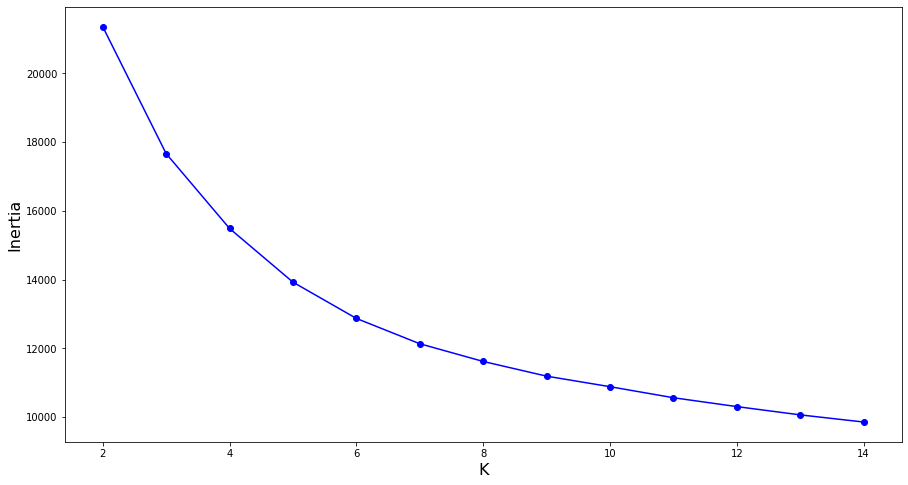

In [12]:
plt.figure(figsize=(15, 8))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('K', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.show()

In [13]:


from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_reduced, model.labels_)
                      for model in kmeans_per_k]



In [14]:
import numpy as np 

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]
# Best number of clusters
best_k

2

For n_clusters = 3 The average silhouette_score is : 0.27631850910386696
For n_clusters = 4 The average silhouette_score is : 0.20237438215974415
For n_clusters = 5 The average silhouette_score is : 0.189792725409922
For n_clusters = 6 The average silhouette_score is : 0.16952221127079975
For n_clusters = 7 The average silhouette_score is : 0.1643385225406785
For n_clusters = 8 The average silhouette_score is : 0.1543556179194927


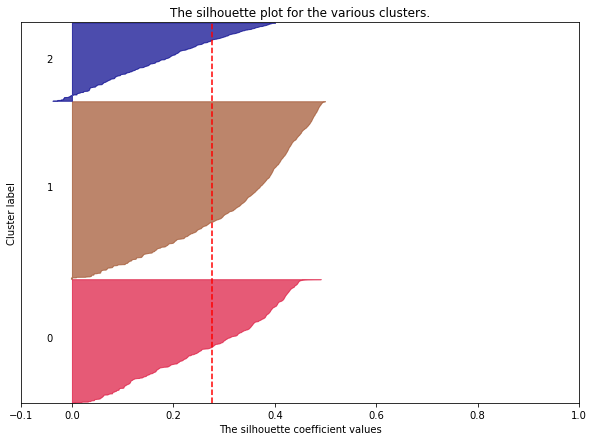

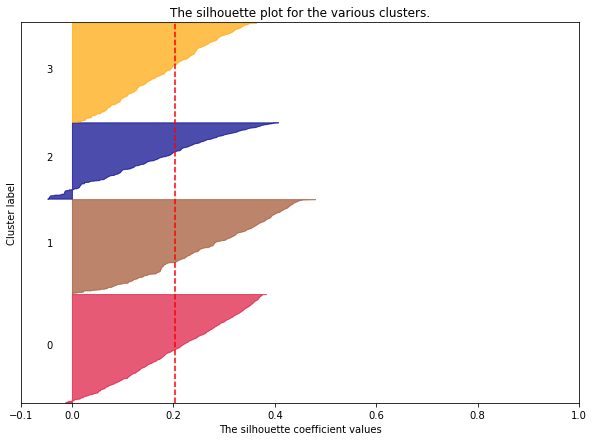

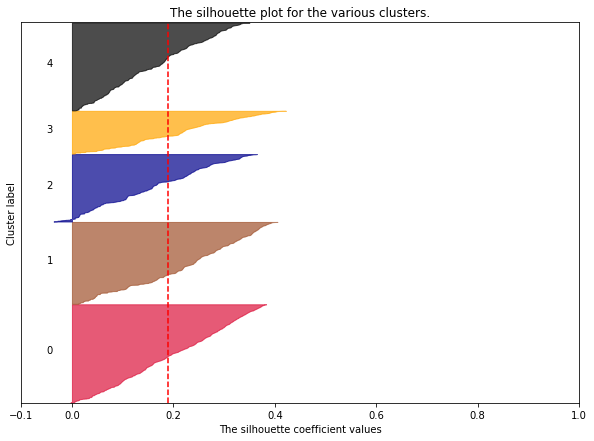

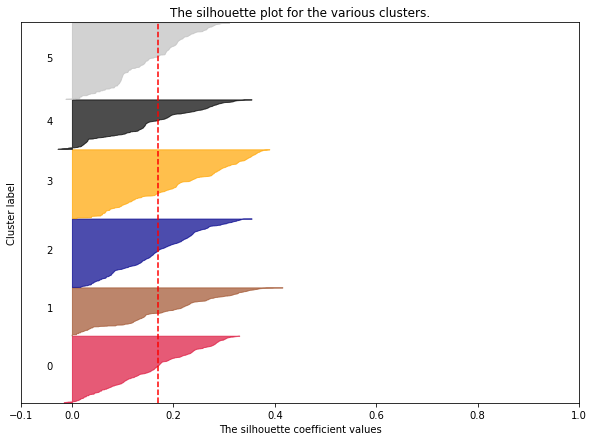

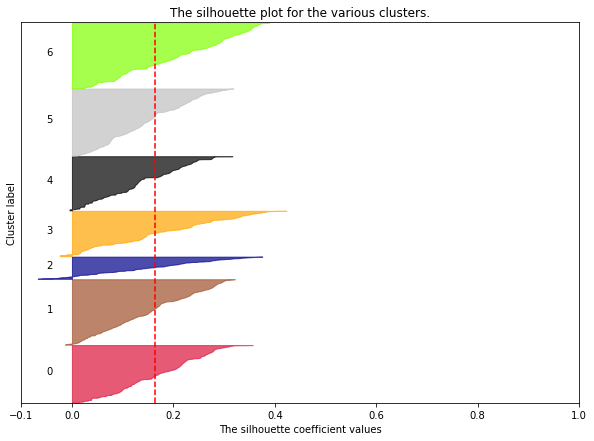

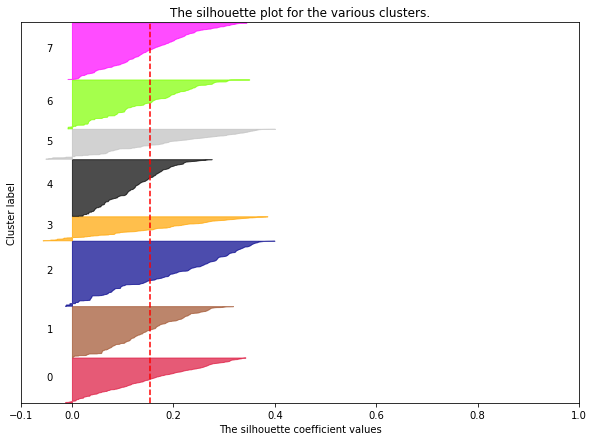

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

cmap = {
    0:'Crimson',
    1:'Sienna',
    2:'DarkBlue',
    3:'Orange',
    4:'Black',
    5:'Silver',
    6:'Chartreuse',
    7:'Fuchsia',
    8:'gray',
    9:'gray',
    10:'gray',
    11:'gray',
    12:'gray',
    13:'gray',
    14:'blue',
    15:'Crimson',
    16:'Sienna',
    17:'DarkBlue',
    18:'Orange',
}

silhouette = []
nb_cluster_max = 8

range_n_clusters = range(3,nb_cluster_max+1)

prep_X = df_reduced

for n_clusters in range_n_clusters:
    # Création d'un subplot
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(prep_X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(prep_X)
    silhouette_avg = silhouette_score(prep_X, cluster_labels)
    silhouette.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Calcul du score silhouette
    sample_silhouette_values = silhouette_samples(prep_X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color[i], edgecolor=color[i], alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

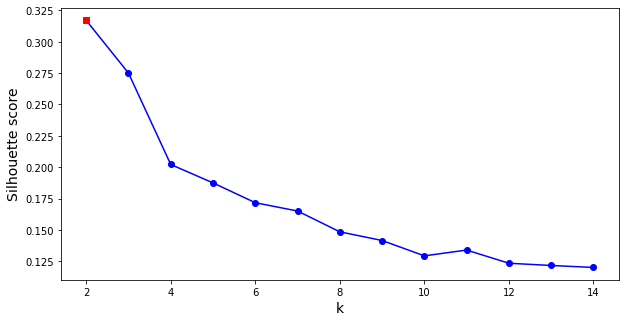

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

In [19]:
best_model = kmeans_per_k[2]
best_model

KMeans(n_clusters=4, random_state=42)

In [20]:
y_pred = best_model.fit_predict(df_reduced)

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_prepared)

/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


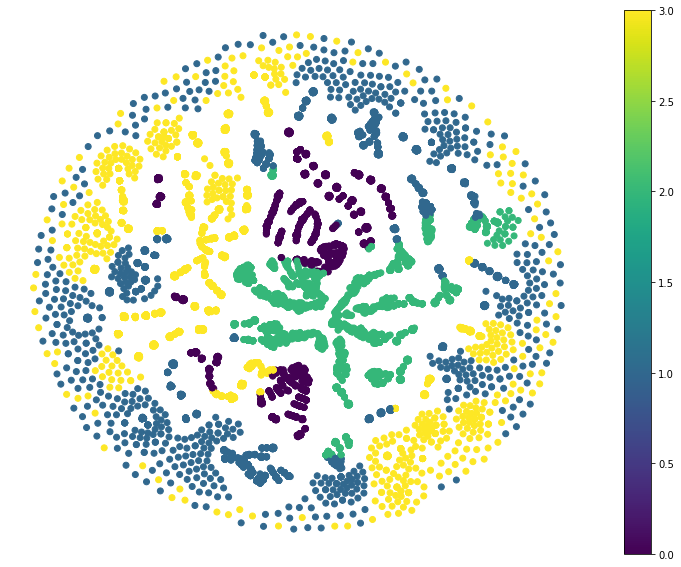

In [22]:
plt.figure(figsize=(13,10 ))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred)
plt.axis('off')
plt.colorbar()
plt.show()

In [34]:
# kmean fit_predict 
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=4, random_state=42).fit(df_reduced)

train['kmean'] = kmean.labels_ 

In [44]:
train['year'] = pd.to_datetime(train.datetime).dt.year
train['hour'] = pd.to_datetime(train.datetime).dt.hour
train['day'] = pd.to_datetime(train.datetime).dt.day
train.drop('datetime', axis=1, inplace=True)

In [50]:
# kmean fit_predict 
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=4, random_state=42)
kmean.fit_predict(train)

train['kmean'] = kmean.labels_

In [56]:
train.groupby('kmean').describe()

season                                              holiday            \
        count      mean       std  min  25%  50%  75%  max   count      mean   
kmean                                                                          
0      1641.0  2.499086  0.891097  1.0  2.0  2.0  3.0  4.0  1641.0  0.028032   
1      3980.0  2.070352  1.094240  1.0  1.0  2.0  3.0  4.0  3980.0  0.028141   
2      2786.0  2.358938  1.062679  1.0  1.0  2.0  3.0  4.0  2786.0  0.025126   
3       656.0  2.344512  0.735304  1.0  2.0  2.0  3.0  4.0   656.0  0.016768   

       ...  hour           day                                             \
       ...   75%   max   count       mean       std  min  25%   50%   75%   
kmean  ...                                                                  
0      ...  18.0  22.0  1641.0   9.910420  5.446180  1.0  5.0  10.0  15.0   
1      ...  12.0  23.0  3980.0   9.840704  5.453152  1.0  5.0  10.0  15.0   
2      ...  19.0  23.0  2786.0  10.167983  5.512297  1.0  5.0  10.0  15.0   
3      ...  18.0  22.0   656.0  10.350610  5.511592  1.0  6.0  11.0  15.0   

             
        max  
kmean        
0      19.0  
1      19.0  
2      19.0  
3      19.0  

[4 rows x 96 columns]

In [55]:
train.groupby('kmean').mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,hour,day
kmean,,,,,,,,,,,,
0,2.499086,0.028032,0.634369,1.294333,25.200634,28.947200,53.659963,13.586996,349.126752,2011.494211,14.394272,9.910420
1,2.070352,0.028141,0.657538,1.507035,16.687206,19.815021,68.300754,11.876233,39.483417,2011.326131,7.870352,9.840704
2,2.358938,0.025126,0.742642,1.378320,21.472168,24.988864,57.946518,13.826929,178.011127,2011.364681,14.322685,10.167983
3,2.344512,0.016768,0.704268,1.227134,27.110000,30.822843,49.385671,14.405643,600.016768,2011.786585,14.971037,10.350610


Le clustering suivants est basé sur 4 groupe : 
- un groupe d'utilisateurs utilsiant le vélos principalement l'apres midi 
- un groupe d'utilisateur utilisant le vélos le matin vers 7h 
- un groupe d'utilisateur utilisant le vélos vers 14h pendant les jours de travails 
- un groupe d'utilisateur utilisant le vélos vers 14h pendant les vacances 

## Comparaison au clustering précédent

In [28]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
train.groupby('weather').mean()

,season,holiday,workingday,temp,atemp,humidity,windspeed,count
weather,,,,,,,,
1,2.278917,0.026579,0.672683,20.782796,24.187122,55.975390,13.053936,192.168991
2,2.182266,0.030004,0.688760,19.912082,23.372960,68.420511,12.301245,165.836095
3,2.298365,0.013624,0.749319,19.389537,22.590198,81.321526,14.301323,106.083106
4,1.000000,0.000000,1.000000,8.200000,11.365000,86.000000,6.003200,164.000000


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

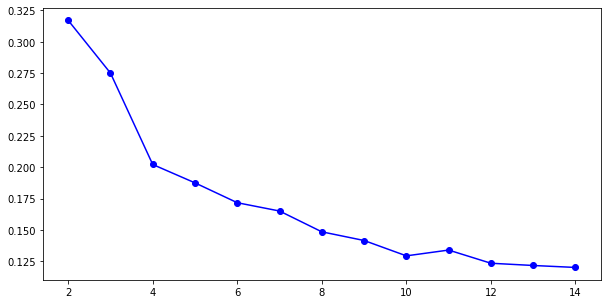

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel(train['weather'], fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

Le clustering est basé sur : 
- un groupe d'utilisateurs qui n'utilisent pas le vélos pendant les vancances et uniquement les jours de travail 
- Un groupe d'utilisateurs qui utilisent majoritairement le vélos lors des jours de travail et de temps en temps lors des vacances 
- Un groupe d'utilisateurs qui est sensible à l'humidité 
- Un groupe d'utilisateur qui est mojns sensible à l'humidité 

## Conclusion

Propositions de solutions pour améliorer l'offre actuelle : 
* Proposer 2 forfaits différents : 
- Un forfait de 5 h à 9 h 
- Un forfait pour la pause du midi/aprés midi